In [2]:
import networkx as nx
import numpy as np
import os
import io
import json
from multiprocessing import Process
import multiprocessing
import matplotlib.pyplot as plt

In [3]:
g = nx.read_graphml("../data/NET-btc-heur_0-week/2012-04-23.graphml")

def degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())

G_degree_dist = degree_dist(g)
G_x = [k for (k,v) in G_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_degree_dist]



In [4]:
def out_degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.out_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())


G_out_degree_dist = out_degree_dist(g)
G_x = [k for (k,v) in G_out_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_out_degree_dist]


In [5]:
def in_degree_dist(G):
    degs = {}
    for n in G.nodes():
        deg = G.in_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
        
    return sorted(degs.items())



G_in_degree_dist = in_degree_dist(g)
G_x = [k for (k,v) in G_in_degree_dist]
G_y = [v/len(g.nodes()) for (k,v) in G_in_degree_dist]

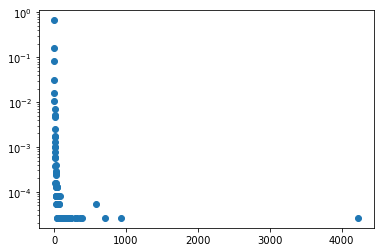

In [6]:
#plt.xscale('log')
plt.yscale('log')
plt.scatter(G_x, G_y)
    

In [7]:
nx.density(g)

4.575182970876192e-05

In [8]:
g = nx.read_graphml("../data/NET-btc-heur_0-week/2010-10-18.graphml")
nx.density(g)

def randomize(g):
    graph = g.copy()
    undirected_graph = graph.to_undirected()
    nswap=np.random.randint(1,len(undirected_graph.edges())/2)
    max_tries=100*len(undirected_graph.edges())
    seed = np.random.randint(1,len(g))
    nx.algorithms.swap.double_edge_swap(undirected_graph, nswap=nswap,seed=seed, max_tries=max_tries)
    return undirected_graph.to_directed()


In [15]:
g_random = randomize(g)
nx.average_clustering(g_random)
nx.degree_assortativity_coefficient(g)

0.023853379989138352

In [121]:
G = nx.barabasi_albert_graph(50, 3)
seed = 1
G_random = nx.algorithms.swap.double_edge_swap(
        G, 
        nswap=len(G.edges())/2,
        seed=seed, 
        max_tries=100*len(G.edges())
    )
nx.average_clustering(G)

0.26842267433289113

In [78]:
nx.average_clustering(G)

0.22859267443942372

In [6]:
import time
start_time = time.time()


nr_cores = multiprocessing.cpu_count()

core_dict = {}
np_files = np.array(os.listdir("data/NET-btc-heur_0-week"))
directory = "data/NET-btc-heur_0-week"
chunk_lst = np.array_split(np_files, nr_cores)

for i in range(nr_cores):
    process_name = f"p{i}"
    file_name = f"test{i}.json"

    with io.open(os.path.join(file_name), 'w') as db_file:
        db_file.write(json.dumps({}))

    core_dict[process_name] = Process(target = files_walker(list(chunk_lst[i]),file_name, directory))
    
    core_dict[process_name].start()

    #core_dict[process_name].join()

print("--- %s seconds ---" % (time.time() - start_time))

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'data/NET-btc-heur_0-week'